In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline


############################################
######## Dataset Generation ################

n_pts = 1000
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

############################################



Using TensorFlow backend.


In [5]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam,loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=Y, verbose=0, batch_size=50, epochs = 50, shuffle='true')

Text(0,0.5,'accuracy')

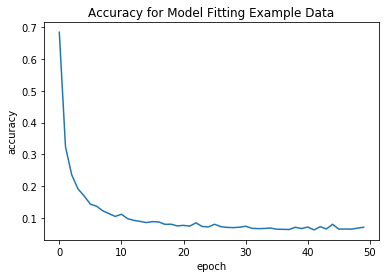

In [6]:
plt.plot(h.history['loss'])
plt.title('Accuracy for Model Fitting Example Data')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [7]:
# Plotting the Predictions on top of the Data

def plot_boundary(data, label, model):
    x_span = np.linspace(min(data[:,0])-1, max(data[:,0])+1)
    y_span = np.linspace(min(data[:,1])-1, max(data[:,1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_] 
    pred_fun = model.predict(grid)
    z = pred_fun.reshape(xx.shape)
    plt.contourf(xx, yy, z)

[[0.916843]]


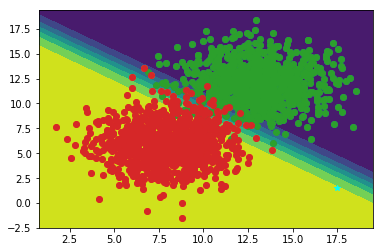

In [8]:
plot_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

# plot_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 17.5
y = 1.5
point = np.array([[x,y]])
predict = model.predict(point)
plt.plot([x],[y], marker ="*",color ='cyan')
print(predict)